**รหัส ชื่อ และหมู่ของนิสิตในกลุ่ม**
- 6610402167 นายพงษ์ศิริ กิตติยุทธนาวิน หมู่ 1
- 6610402060 นายธนกฤต ตระการจันทร์ หมู่ 1

**วัตถุประสงค์ของระบบต้นแบบ**
- ทำนายคะแนน(Rating) ที่ผู้ซื้อให้ จากรีวิวของผู้ใช้เอง(Title + Text)

**ลิงค์ไปยังข้อมูลที่จะใช้ในระบบต้นแบบ**
- Dataset: https://amazon-reviews-2023.github.io/
**ประเด็นอื่น ๆ ที่เกี่ยวข้องกับข้อมูลของตัวเอง**
- ข้อมูลนี้อาจมี Feature ที่ดีกว่านี้จากการทำ Feature Crossing ที่เหมาะสม

**การมีส่วนร่วมของสมาชิกแต่ละคนในกลุ่ม (แต่ละคนทำอะไรบ้าง)**
- พงษ์ศิริ ทำในส่วน imbalance ของข้อมูล และ ดููว่าข้อมูลจำเป็นหรือสามารถสร้างข้อมูลเพิ่มได้หรือไม่
- ธนกฤต ทำในส่วน ข้อมูลจะมีการ sampling แบบใด และ การกำหนดเฉลย (labeling)
**การเปิดเผยการใช้เครื่องมือปัญญาประดิษฐ์ (ใช้อะไร ใช้เพื่ออะไร ใช้อย่างไร, prompt อย่างไร)**
- ใช้หาแนวทางการ argmentation ข้อมูล *prompt: `Data Synthetic code for rating and review message data`*

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split

In [4]:
reviewData = pd.read_csv('../assets/my_data/review_data.csv')
reviewData.head()

,Unnamed: 0,user_id,rating,title,text,verified_purchase,review
0,1,AHSPLDNW5OOUK2PLH7GXLACFBZNQ,5.0,Lots of Fun,I love playing tapped out because it is fun to...,True,lot fun love playing tapped fun watch town gro...
1,2,AHSPLDNW5OOUK2PLH7GXLACFBZNQ,5.0,Light Up The Dark,I love this flashlight app! It really illumin...,True,light dark love flashlight app really dark coo...
2,3,AH6CATODIVPVUOJEWHRSRCSKAOHA,4.0,Fun game,One of my favorite games,True,fun game one favorite game
3,4,AEINY4XOINMMJCK5GZ3M6MMHBN6A,4.0,I am not that good at it but my kids are,Cute game. I am not that good at it but my kid...,True,good kid cute game good kid love nik
4,5,AEINY4XOINMMJCK5GZ3M6MMHBN6A,4.0,good game,"Made me think , variety of the puzzles kept it...",True,good game made think variety puzzle kept fun p...


### Simpling
ใช้ Stratified Sampling โดยแบ่งข้อมูลออกเป็น 2 ส่วน คือ 70% สำหรับ Train และ 30% สำหรับ Test

In [5]:
X, y = train_test_split(
    reviewData, test_size=0.3,
    stratify=reviewData["rating"],
    random_state=12
)


In [6]:
X.head()

,Unnamed: 0,user_id,rating,title,text,verified_purchase,review
2149957,2240942,AFBHVFW44OLTXWZS6BSRSCHHCEUA,1.0,One Star,App does not work,True,one star app work
1093165,1143196,AHG2XET5PS7TBLE6ZQBTAPNSDHEA,1.0,not what I was looking for,I uninstalled after realizing that this site w...,True,looking uninstalled realizing site looking wan...
3867838,4049788,AGI4PF4363FCR5YJHEMD74XT2NVQ,5.0,Fun game,This game is really fun and I just got this ga...,True,fun game game really fun got game way better f...
1029177,1075939,AEJW4H2HOUC2U3TCPAGW57S6KC5A,5.0,Fun time for all,I enjoy the games. They are all different. Mor...,True,fun time enjoy game different exciting game
1518459,1587586,AELVNIPXO5QVBBWYTMPECNIWNUJQ,1.0,Cannot find a way to actually begin a game of ...,I love the actual board game and just got this...,True,cannot find way actually begin game amazon fir...


### Labeling

ข้อมูลที่ใช้ในต้นแบบเป็น Natural Labels ซึ่งเป็นข้อมูลที่มีการเขียนโดยมนุษย์ ซึ่งเป็นแบบ explicit labels ที่เก็บข้อมูลจาก user feedback 

### Imbalance

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

/var/folders/zp/0883xgcn3jv6296x6q307xdw0000gn/T/ipykernel_50563/2901979246.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=class_counts.index, y=class_counts.values, palette='viridis')


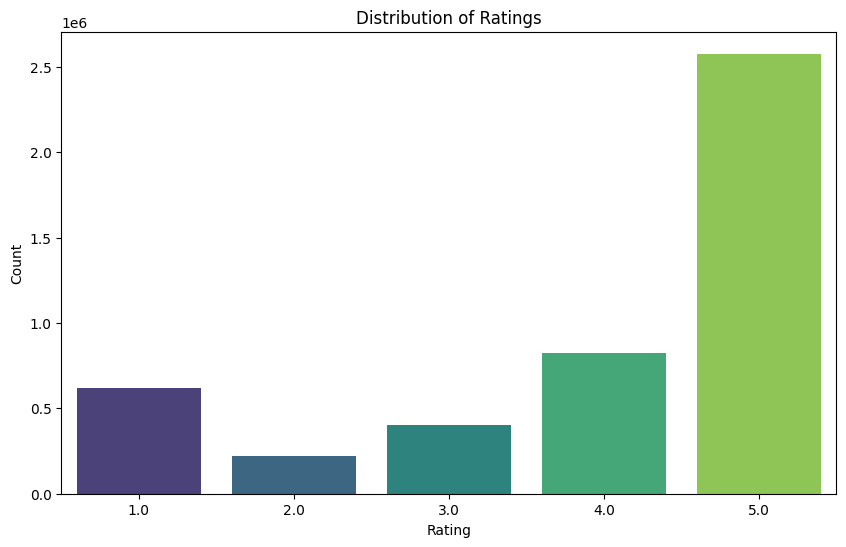

In [8]:

# Identify the target variable
# Replace 'target' with the name of your target column
target_column = 'rating'

# Count the occurrences of each class
class_counts = reviewData[target_column].value_counts()


# Visualize the class distribution
plt.figure(figsize=(10, 6))
sns.barplot(x=class_counts.index, y=class_counts.values, palette='viridis')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.title('Distribution of Ratings')
plt.show()

ข้อมูล imbalance จากที่ rating 5.0 มีจำนวนมากกว่า rating 1.0 ถึง 4.0 อย่างมาก จึงใช้การ Resampling โดยการ Undersampling ในการทำ balance ข้อมูล

In [9]:
X['review'] = X['review'].str.replace('<br />', '')
y['review'] = y['review'].str.replace('<br />', '')
X['text'] = X['text'].str.replace('<br />', '')
y['text'] = y['text'].str.replace('<br />', '')
X['title'] = X['title'].str.replace('<br />', '')
y['title'] = y['title'].str.replace('<br />', '')

In [10]:
from imblearn.under_sampling import RandomUnderSampler

# Define the undersampling method
undersampler = RandomUnderSampler(random_state=42)

# Undersample the dataset
X_under, y_under = undersampler.fit_resample(X, y)

# Count the occurrences of each class
class_counts = y_under.value_counts()
class_counts

TypeError: '<' not supported between instances of 'str' and 'int'

ระหว่างการทำ undersampling พบว่ามีอักขระที่ทำให้เกิดปัญหาในการ fit sampling จึงยังไม่ได้ทำการ undersampling ซึ่งได้พยายาม replace อักขระด้วยค่าที่เหมาะสมแล้วทำการ undersampling อีกครั้ง แต่ยังไม่สามารถทำได้

### Augmentation

ได้ทำการ augmentation โดยการสร้างข้อมููลเพิ่มอีกจำนวนหนึ่งโดยการนำ user_id คนหนึ่งกับ rating และ review ของอีกคนมาสรวมกันให้เกิดข้อมูลใหม่
*แต่ตามมาด้วยผลเสีย* คือ ข้อมูลที่สร้างขึ้นมีความเป็นไปได้ที่จะไม่เป็นข้อมูลที่เป็นไปตามความจริง อาจมีข้อมููลที่คล้่ายกัน ไม่หลากหลาย

In [76]:
import numpy as np
import random

In [ ]:
X.iloc[random.sample(range(0, len(X)), 10)]

In [72]:
X.head(6)

,Unnamed: 0,user_id,rating,title,text,verified_purchase,review
2149957,2240942,AFBHVFW44OLTXWZS6BSRSCHHCEUA,1.0,One Star,App does not work,True,one star app work
1093165,1143196,AHG2XET5PS7TBLE6ZQBTAPNSDHEA,1.0,not what I was looking for,I uninstalled after realizing that this site w...,True,looking uninstalled realizing site looking wan...
3867838,4049788,AGI4PF4363FCR5YJHEMD74XT2NVQ,5.0,Fun game,This game is really fun and I just got this ga...,True,fun game game really fun got game way better f...
1029177,1075939,AEJW4H2HOUC2U3TCPAGW57S6KC5A,5.0,Fun time for all,I enjoy the games. They are all different. Mor...,True,fun time enjoy game different exciting game
1518459,1587586,AELVNIPXO5QVBBWYTMPECNIWNUJQ,1.0,Cannot find a way to actually begin a game of ...,I love the actual board game and just got this...,True,cannot find way actually begin game amazon fir...
570846,597094,AE6HLW2C55FWILP2VQMN6V4OU5KQ,4.0,hidden object great,Great game love the hidden object scenes in th...,True,hidden object great great game love hidden obj...


In [93]:
def get_rating_wtih_review(user_id):
    [rating, review, title] = X.iloc[random.sample(range(0, len(X)), 1)][['rating', 'review', 'title']].values[0]
    return rating, review, title

def get_user_id():
    n = np.random.randint(0, len(reviewData))
    user_ids = reviewData['user_id'].iloc[n]
    return user_ids


def generate_synthetic_data(n):
    data = []
    for i in range(n):
        user_id = get_user_id()
        rating, review, title = get_rating_wtih_review(get_user_id())
        
        row = {
            'Unnamed: 0': np.random.randint(1_000_000, 99_999_999),
            'user_id': user_id,
            'rating': rating,
            'title': title,
            'text': review,
            'verified_purchase': True,
            'review': review
        }
        data.append(row)
        
    return data

In [94]:
synthetic_data = pd.DataFrame(generate_synthetic_data(100))
synthetic_data.head(6)

,Unnamed: 0,user_id,rating,title,text,verified_purchase,review
0,85777125,AHIHCMYF623HYGHERNGJCZHQUZPA,5.0,HP,hp work well computer well,True,hp work well computer well
1,38415293,AFFOX4HQE6757WVEM6KLE6LXOY6Q,5.0,Great product,great product received time product easy insta...,True,great product received time product easy insta...
2,35267123,AF4CE64CB4XSFXAAPIRE2FNLYLVQ,2.0,ok,ok game would great able see hidden object loc...,True,ok game would great able see hidden object loc...
3,81867758,AEBKFQAFFHS5P6SSIDX6VYVLQLXA,1.0,I did not make this order. Why is it here,make order order past two day two order,True,make order order past two day two order
4,67953724,AEZWZDG7U4GEVXWDLXRV6A5RWQEQ,5.0,good game,good game good game enjoy playing wish bonus s...,True,good game good game enjoy playing wish bonus s...
5,47222209,AEPBX76FU4UPNZA245QB3C2SKHKQ,3.0,Animal Jigsaw Puzzles,animal jigsaw puzzle friend using kindle jigsa...,True,animal jigsaw puzzle friend using kindle jigsa...


In [95]:
# add the synthetic data to the original data
combined_data = pd.concat([reviewData, synthetic_data]).reset_index(drop=True)
combined_data.tail(10)

,Unnamed: 0,user_id,rating,title,text,verified_purchase,review
4642465,42362793,AGQTWY7SK37P6QIEHLK3AGO6C5VA,5.0,Flow Free is awesome:),flow free awesome flow free awesome game easy ...,True,flow free awesome flow free awesome game easy ...
4642466,66763079,AHZ776XF2H2DA27KMJF3YXDRBLZA,5.0,restful,restful love timer trying go sleep,True,restful love timer trying go sleep
4642467,54417371,AFU6XY5EY6PHH64ZH2FNBGLELGNQ,1.0,Strange accounting game,strange accounting game somewhat mixed left ga...,True,strange accounting game somewhat mixed left ga...
4642468,90255296,AHZPJNCAG6ZMIIOIMIBECOBICQFA,5.0,Best pixel game ever,best pixel game ever awesome game multiplayer,True,best pixel game ever awesome game multiplayer
4642469,81610939,AF735MC2A3GLL3D2POCXCXQ5HJNA,5.0,Awesome😂😂😂,awesome recommended everyone amazing game,True,awesome recommended everyone amazing game
4642470,32161780,AFWBARWXT7M7U24N4KF5KFOFWXYQ,5.0,graphics rock:),graphic rock love graphic make feel like youre...,True,graphic rock love graphic make feel like youre...
4642471,15933005,AGJAGWEEV45VB6EBDGM6VZK3SXSQ,5.0,Taxes Made Easy,tax made easy easy software install easy updat...,True,tax made easy easy software install easy updat...
4642472,2121773,AHBFVRGWMWNRXX6I4MAH2MVVUAMQ,4.0,Recommend,recommend work great vocabulary homework kid s...,True,recommend work great vocabulary homework kid s...
4642473,28539587,AHX6A4UU3L5OZYKEDMJ32JKBAEXA,2.0,Game like casinos,game like casino looking different game came a...,True,game like casino looking different game came a...
4642474,82918632,AHHGLYJJ3VTWMFQ5L2CZIWFPKPAA,4.0,4 star,4 star wouldve 5 1 thing able customize person,True,4 star wouldve 5 1 thing able customize person
